<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/RandomSelect_Bootstrap1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resampling with replacement

```
# This is formatted as code
```



Install cupy-cuda

In [1]:
!pip install cupy-cuda100

     |████████████████████████████████| 58.9 MB 20 kB/s 


In [2]:
import numpy as np
import cupy as cp
import torch
import tensorflow as tf
import pandas as pd
import random
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Create a histogram function

In [8]:
def histogram(data: np.array, bins=50):

  plt.rcParams['figure.figsize'] = (20,3)
  cm = plt.cm.get_cmap('RdYlGn')

  plt.rcParams['figure.figsize'] = (6,2)

  n, bins, patches = plt.hist(data, bins = bins)
  bin_centers = 1*(bins[:-1] + bins[1:] )
  col = bin_centers - min(bin_centers)
  col /= max(col)

  for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

  plt.show()

In [14]:
x = list(range(100))
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


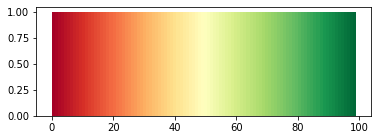

In [24]:
histogram(data = x, bins=len(x))

### Random in python

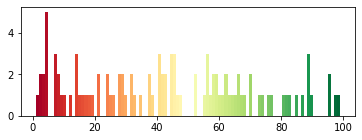

In [26]:
## random.randint (Noted that range from [0 - k-1])
k = len(x)
rs_idx = [random.randint(0,k-1) for i in range(k)]

histogram(data = np.array(x)[rs_idx], bins = len(x))

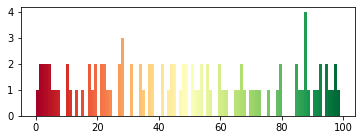

In [28]:
# random.randrange
rs_idx = [random.randrange(0,k) for i in range(k)]

histogram(data = np.array(x)[rs_idx], bins=len(x))

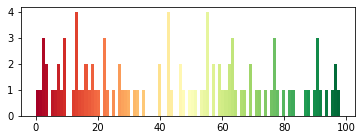

In [32]:
### random.uniform
rs_idx = [int(random.uniform(0,k)) for i  in range(k)]

histogram(data = np.array(x)[rs_idx], bins=len(x))

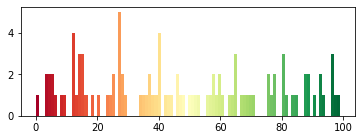

In [33]:
### random.choices
rsx = random.choices(x, k= 100)

histogram(data = rsx, bins = len(rsx))

## Random.sample operates in a UN-Replacement mechanism. It means that we swap elements in a list

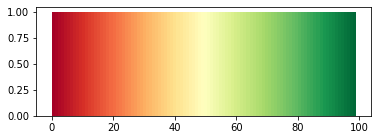

In [36]:
rsx_wor = random.sample(list(x), k = 100)

histogram(data = rsx_wor, bins=len(rsx))

In [37]:
print(rsx_wor)

[17, 36, 65, 24, 68, 31, 23, 0, 63, 97, 58, 88, 79, 92, 69, 51, 3, 64, 60, 95, 6, 26, 8, 37, 15, 48, 77, 42, 83, 87, 67, 75, 33, 91, 16, 32, 41, 45, 59, 43, 47, 98, 1, 39, 96, 21, 50, 76, 28, 82, 11, 29, 89, 62, 86, 74, 73, 80, 13, 57, 4, 25, 20, 90, 19, 54, 14, 85, 22, 93, 9, 81, 2, 44, 12, 30, 56, 52, 70, 99, 49, 72, 27, 84, 7, 53, 61, 5, 18, 78, 10, 34, 94, 66, 35, 46, 40, 55, 71, 38]


## Numpy

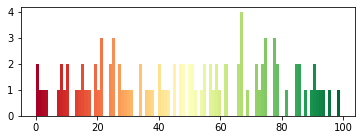

In [38]:
# numpy.randint taka random sample in range [0, k]

x = np.array(x)

rs_idx = np.random.randint(0,k,k)

histogram(data = x[rs_idx], bins=len(rsx))

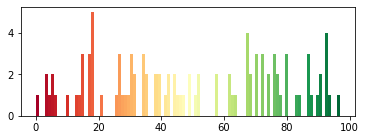

In [39]:
# numpy.choices

rsx = np.random.choice(x, size=k, replace=True)

histogram(rsx, len(rsx))

## Pythorch
Required GPU to run

In [4]:
def torch_boot_idx(pop_size, num_samples):
    p = torch.ones(pop_size, device='cuda') / pop_size
    return p.multinomial(num_samples=num_samples, replacement=True)

Time consume: 0.00030875205993652344


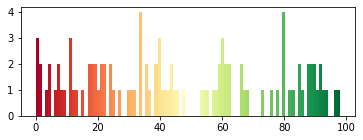

In [11]:
import time
k = 100
x = np.array(range(k))
tor_idx = torch_boot_idx(pop_size = k, num_samples = k)
tic = time.time()
torch_x = torch.tensor(x, device = 'cuda') # Lưu ý: đang dùng GPU
toc = time.time()
print('Time consume:', toc - tic)
histogram(data = torch_x[tor_idx].cpu().detach().numpy(), 
          bins=k)

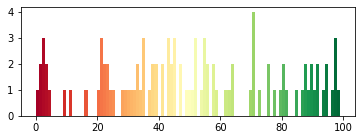

In [12]:
tor_idx = torch.randint(0,k,size = (k,), device = 'cuda')

histogram(data = torch_x[tor_idx].cpu().detach().numpy(), 
          bins=k)

## Tensorflow

In [13]:
tf_x = tf.convert_to_tensor(x)

tf_x

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])>

In [14]:
tf_idx = tf.random.uniform((k,), minval=0, maxval=k, dtype = tf.dtypes.int32)

tf_idx

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([54, 91, 57, 54, 70, 54, 32, 96, 52, 98, 28,  8, 83, 79, 66, 32, 90,
       41, 24, 68, 20, 37, 57, 68, 75, 12, 90, 73, 64, 30, 91, 82, 82,  4,
       91, 30, 71, 43, 30, 61, 93, 69, 16, 74, 66,  7, 53, 54, 38, 82, 50,
        2, 44, 75, 78, 82, 34, 52,  1, 27, 72, 94, 52, 66,  0, 15, 90, 43,
       44, 34, 33, 44, 77, 50, 55, 51, 91, 40, 76, 98, 44, 40, 45, 33, 10,
       26, 81, 77,  5, 99,  2, 36, 92, 79, 48, 94, 17,  8, 99, 52],
      dtype=int32)>

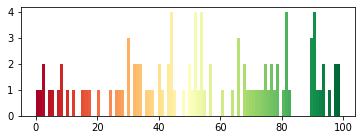

In [15]:
histogram(data = tf_x.numpy()[tf_idx], 
          bins=k)

## Cupy

In [16]:
gpu_x = cp.asarray(x)

gpu_x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [17]:
cp_rsx = cp.random.choice(gpu_x, size=k, replace=True)

cp_rsx

array([ 4, 62, 35, 35, 57, 49, 61, 88, 36, 54,  5, 49, 32, 75, 95, 10, 69,
       42, 63, 50, 28,  8, 15,  3, 31, 41, 26, 51, 34, 95, 51, 20,  4, 27,
       89, 81, 34, 83, 59, 41, 97, 65, 29, 24, 90, 30, 87, 56, 61,  8, 25,
       31, 64,  9, 51,  5,  9, 48, 99, 67, 69, 66, 25, 14, 15,  9, 67, 92,
       93, 51, 23,  2,  0, 26, 52,  1, 72, 68,  0, 97, 50, 67, 17, 67, 89,
       16, 63, 71, 14, 88, 75,  6, 21, 24, 31, 36, 24,  6, 47, 29])

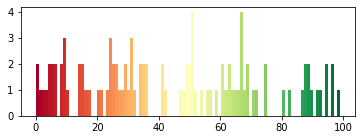

In [18]:
histogram(data = cp.asnumpy(cp_rsx), bins = k)

## Pandas

In [20]:
# Pandas series

pd_x = pd.Series(x)

pd_x

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Length: 100, dtype: int64

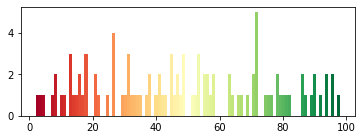

In [22]:
pd_rsx = pd_x.sample(n=k, replace=True)

histogram(data= pd_rsx, bins=k)